<h1>Logistic Regression with Stochastic Gradient Descent</h1>


In [168]:

import pandas as pd
import numpy as np
import math 
from matplotlib.pyplot import *

In [169]:
# Sample dataset 
dataset = pd.read_csv('dataset.txt', sep="|", names =['x1', 'x2', 'y'])

In [170]:
# get Learning rate 
def getLearningRate(rate):
    return rate

In [171]:
# get Bias value
def getBiasValue(biasVal):
    return biasVal

In [172]:
# Declare required component
b0_list = []
b1_list = []
b2_list = []
sharpPred = []
squaredError = []
rmse = []
errorList = []
Accuracy = []
b0 = 0
b1 = 0
b2 = 0


# sharp_pred

def sharpPrediction(prediction):
    if prediction < 0.5:
        return 0
    else:
        return 1

# error

def errorFind(y, sharp_prediction):
    if sharp_prediction == y:
        return 0
    else:
        return 1
        

In [173]:
# Logistic Regression Function 
def logisticRegression(iterations, bias, x1_data, x2_data, y_data, b0, b1, b2, learning_rate):
    for i in range(0, iterations):
        rmse_list = []
        error_list = []
        for x1, x2, y in zip(x1_data, x2_data, y_data):
            prediction = (1 / (1 + math.exp(-(bias * b0 + x1 * b1 + x2 * b2))))
            b0_list.append(b0)
            b1_list.append(b1)
            b2_list.append(b2)
            b0 = b0 + learning_rate * (y - prediction) * prediction * (1 - prediction) * bias
            b1 = b1 + learning_rate * (y - prediction) * prediction * (1 - prediction) * x1
            b2 = b2 + learning_rate * (y - prediction) * prediction * (1 - prediction) * x2
            sharp_pred = sharpPrediction(prediction)
            squared_error = ( y - prediction ) ** 2
            rmse_list.append(squared_error)
            error = errorFind(y, sharp_pred)
            #print(y, '  ', sharp_pred)
            error_list.append(error)
        rmse.append(sum(rmse_list))
        Accuracy.append((1 - (sum(error_list)/len(error_list)))*100)
    return b0, b1, b2

In [174]:

b0, b1, b2 = logisticRegression(3, 1, dataset['x1'], dataset['x2'], dataset['y'], b0, b1, b2, 0.3)

In [202]:
print(Accuracy)
Accuracy = []
rmse = []

[70.0, 80.0, 80.0, 90.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [203]:
# Accuracy of prediction still need to be updated, So for that we need to to add more iteration 
b0, b1, b2 = logisticRegression(10, 1, dataset['x1'], dataset['x2'], dataset['y'], 0, 0, 0, 0.3)

In [204]:
print(Accuracy)

[70.0, 80.0, 80.0, 90.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [205]:
# Now the Accuracy number reaches upto 100 %

In [206]:
# Finally we have co-efficient 
b0, b1, b2 

(-0.40660546399030367, 0.85257331635810374, -1.1047462590413235)

In [207]:
# $$$ Prediction Function for Evaluation 

def evaluatePrediction(x1_data, x2_data, B0, B1, B2):
    predicted_data = []
    for x1, x2 in zip(x1_data, x2_data):
        predicted_data.append((1 / (1 + math.exp(-(b0 + b1 * x1 + b2 * x2)))))
    return predicted_data
    


In [208]:
predicted_data = evaluatePrediction(dataset['x1'], dataset['x2'], b0, b1, b2)

In [209]:
# $$$ Calculate Crisp (Round off of evaluated output )

def crisp(predicted_data):
    data = []
    for i in predicted_data:
        if i < 0.5:
            data.append(0)
        else:
            data.append(1)
    return data

In [210]:
crisp_data = crisp(predicted_data)

In [211]:
# $$$ Error Evaluation 

def errorevaluate(y_data, crisp_data):
    data = []
    for i,j in zip(y_data,crisp_data):
        if i == j:
            data.append(0)
        else:
            data.append(1)
    return data
        

In [212]:
error_evaluation = errorevaluate(dataset['y'], crisp_data)

In [213]:
error_evaluation # Error evaluation is zero for all observation.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [214]:
# Hence Accuracy will be 
accuracy_percentage =  (1 - (sum(error_evaluation)/len(error_evaluation))) * 100
print(accuracy_precentage, "%") # 100 %

100.0 %


In [223]:
# Plot the data

In [224]:
import matplotlib.patches as mpatches


scatter(dataset['x1'], dataset['x2'], c=dataset['y'])
blue_patch = mpatches.Patch(color='blue', label='Zero')
yellow_patch = mpatches.Patch(color='yellow', label='One')
legend(handles=[blue_patch, yellow_patch])
title('Scatter Plot for Classification')


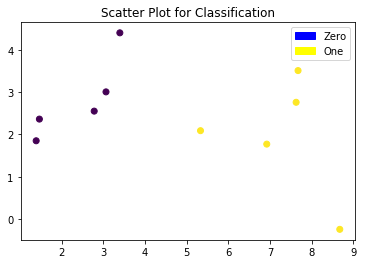

In [225]:
show()

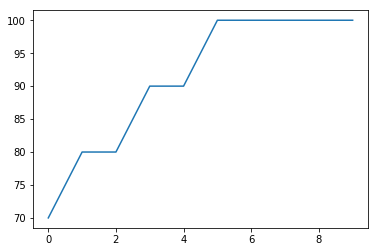

In [226]:
# Accuracy Graph

plot(Accuracy, '-')
show()

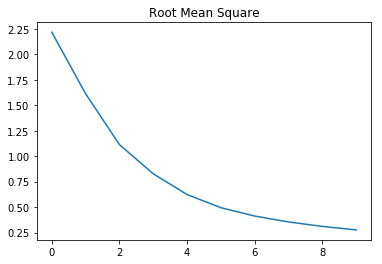

In [227]:
plot(rmse, '-')
title('Root Mean Square')
show()